In [6]:
%matplotlib inline
import numpy as np
from IPython.display import display, clear_output
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, IntSlider
import matplotlib.pyplot as plt
from PIL import Image
import time
import warnings
from time import sleep
warnings.filterwarnings('ignore')

In [7]:
face = np.array(Image.open('resources/face.png'), dtype=np.uint8)

## Integral Images and Haar-Like Features

1. As first task you have to implement the calculation of an integral image
2. In the second task you have to use the HorizontalFeature in combination with the integral image to find the best position for the Haar-like feature in the image.

![](resources/task.png)

In [8]:
class HorizontalFeature:
    def __init__(self, width, height):
        """
        A simple Helper class for a horizontal Haar-like feature
        
        Half of the height is a positive region and the other half the negative region
        """
        self.positive = (0, 0, width, height // 2) # (x1, y1, x2, y2)
        self.negative = (0, height // 2, width, height) # (x1, y1, x2, y2)
        
        self.shape = (height, width)
        self.ndarray = np.ones((height,width)) * -1
        self.ndarray[:height // 2, :] = 1
    
    def __str__(self):
        return 'Positive: %s, Negative: %s' % (self.positive, self.negative)
    
    def get_sum(self, integral_image, x, y):
        """
        Returns the pixel sum of an area at pos x, y using an integral image
        """
        
        data = [] 

        for rect in [self.positive, self.negative]:
            a = integral_image[y + rect[1], x + rect[0]]
            b = integral_image[y + rect[1], x + rect[2]]
            c = integral_image[y + rect[3], x + rect[0]]
            d = integral_image[y + rect[3], x + rect[2]]
            
            data += [d + a - b - c]                
        
        return data
        

feature = HorizontalFeature(120, 40)

### Integral Image - Solution 1 

In [9]:
integral = np.cumsum(face,axis=0, dtype=np.int64)
integral = np.cumsum(integral,axis=1)

### Integral Image - Solution 2

In [10]:
integral = np.zeros_like(face,dtype=np.int64)

for y in range(0, integral.shape[0]):
    for x in range(0, integral.shape[1]):  
        left =  integral[y, x - 1] if x > 0 else 0
        top = integral[y - 1, x] if y > 0 else 0
        top_left = integral[y - 1, x - 1] if x > 0 and y > 0 else 0
        integral[y,x] =  face[y, x] + left + top - top_left

In [11]:
min_sum = np.inf
p = None
for y in range(0, integral.shape[0] - feature.shape[0]):
    for x in range(0, integral.shape[1] - feature.shape[1]):          
        pos, neg = feature.get_sum(integral, x, y)
        if pos - neg < min_sum:
            min_sum = pos - neg
            p = (y, x)        

### Visualization

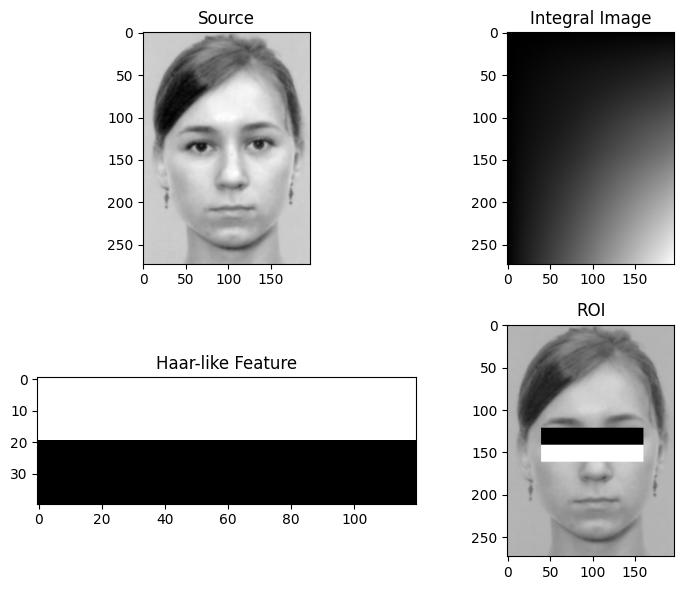

<Figure size 640x480 with 0 Axes>

In [12]:
face_weak = face.copy()
face_weak[p[0]:p[0]+feature.ndarray.shape[0], p[1]:p[1]+feature.ndarray.shape[1]] = feature.ndarray
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)
plt.title("Source")
plt.imshow(face, cmap='gray')

plt.subplot(2,2,2)
plt.title("Integral Image")
plt.imshow(integral, cmap='gray')

plt.subplot(2,2,3)
plt.title("Haar-like Feature")
plt.imshow(feature.ndarray, cmap='gray')


plt.subplot(2,2,4)
plt.title("ROI")
plt.imshow(face_weak, cmap='gray')


plt.tight_layout()
plt.show()
plt.savefig('bla.png')